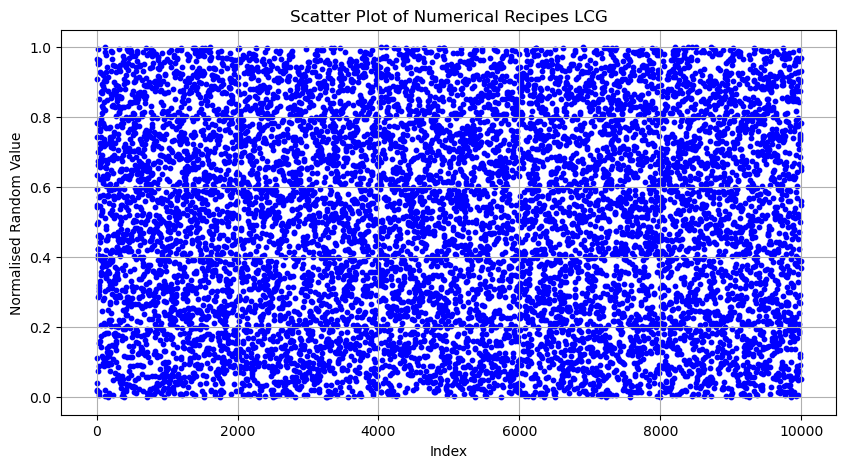

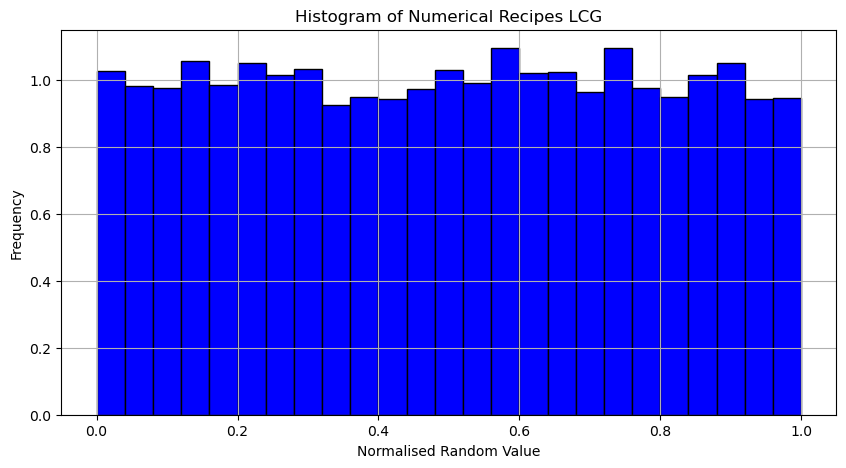

In [6]:
# Linear Congruential Generator (LCG) using the 'Numerical Recipes' parameter set

import matplotlib.pyplot as plt
import numpy as np

def lcg_sequence(seed, a, c, m, n_terms):
    """
    Generates an LCG sequence of length n_terms

    Parameters:
        seed (int): initial value
        a, c, m (int): generator parameters (a=multiplier, c=increment, m=modulus)
        n_terms (int): number of outputs

    Returns:
        list[int]: sequence of pseudo-random integers
    """
    x = seed
    seq = []
    for _ in range(n_terms):
        x = (a * x + c) % m
        seq.append(x)
    return seq

# Numerical Recipes LCG parameters (Press & Teukolsky, 1992)
a = 1664525
c = 1013904223
m = 2**32

seed = 12345
n_terms = 10000

# Generates a length-10000 integer PRN sequence
nums = lcg_sequence(seed, a, c, m, n_terms)

# Converts to floats in [0, 1] for visual analysis
nums_norm = np.array(nums) / m
x = np.arange(n_terms)

# Scatter plot to inspect structure and spread
plt.figure(figsize=(10,5))
plt.scatter(x, nums_norm, s=10, color='blue')
plt.title("Scatter Plot of Numerical Recipes LCG")
plt.xlabel("Index")
plt.ylabel("Normalised Random Value")
plt.grid(True)

# Histogram to assess approximate uniformity
plt.figure(figsize=(10,5))
plt.hist(nums_norm, bins=25, density=True, color='blue', edgecolor='black')
plt.title("Histogram of Numerical Recipes LCG")
plt.xlabel("Normalised Random Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()

Random number for exponential distribution at u=0.46: 0.4108


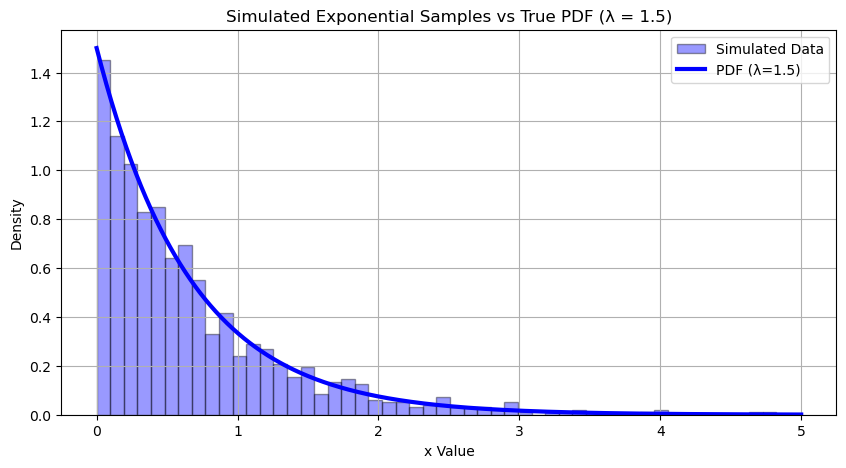

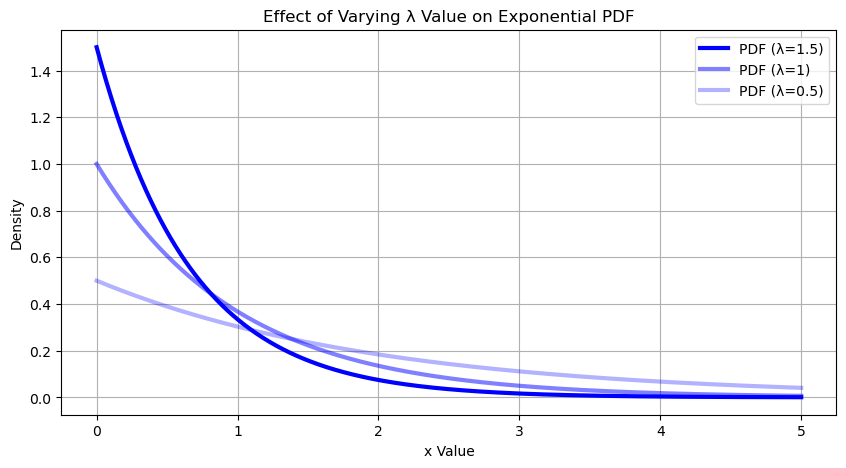

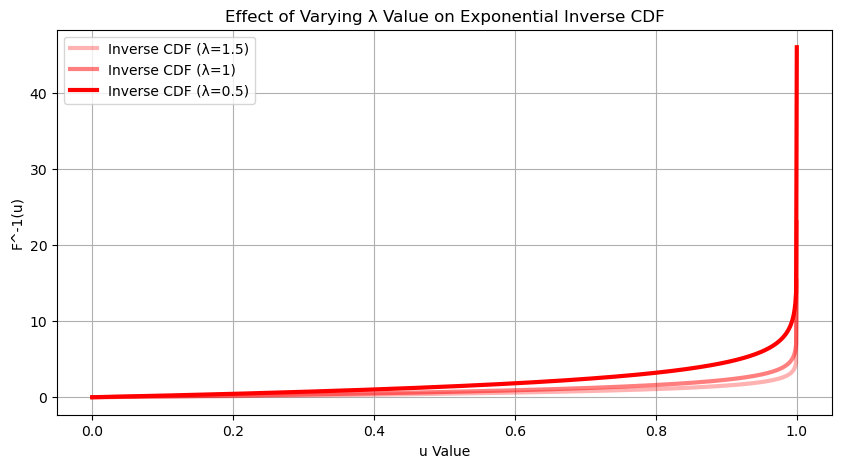

In [7]:
# Non-uniform random number generation using inverse transform sampling

import numpy as np
import matplotlib.pyplot as plt

# Exponential PDF for varying rate parameters (λ)
x = np.linspace(0, 5, 1000)      # evenly spaced points for plotting
y_1 = 1.5 * np.exp(-1.5 * x)      # PDF for λ=1.5
y_2 = 1 * np.exp(-1 * x)      # PDF for λ=1
y_3 = 0.5 * np.exp(-0.5 * x)      # PDF for λ=0.5

# Avoid log(0) issues by adding a small epsilon
eps = 1e-10
u = np.linspace(eps, 1 - eps, 1000)  

# Inverse CDF (quantile function) for exponential distribution
z_1 = -np.log(1-u) / 1.5
z_2 = -np.log(1-u) / 1
z_3 = -np.log(1-u) / 0.5

def exp(v, λ):
    """
    Computes the inverse CDF of an exponential distribution

    Parameters:
        v (float or np.ndarray): uniform random number(s) in the range (0, 1)
        λ (float): rate parameter of the exponential distribution

    Returns:
        float or np.ndarray: corresponding exponential random number(s)
    """
    return -np.log(1 - v) / λ

# Example to generate a random value for a specific probability
v = 0.46      # chosen probability value
λ = 1.5      # rate parameter
e = round(exp(v, λ), 4)
print("Random number for exponential distribution at u=0.46:", e)

# Generate a sample of exponential random variables using uniform samples
N = 1000
us = np.random.rand(N)      # uniform random numbers in [0,1]
xs = exp(us, λ)      # transform to exponential distribution using inverse CDF

# Plot histogram of simulated exponential samples with PDF overlay
plt.figure(figsize=(10,5))
plt.hist(xs, bins=50, density=True, color='blue', alpha=0.4, edgecolor='black', label="Simulated Data")
plt.plot(x, y_1, linewidth=3, color='blue', label="PDF (λ=1.5)")
plt.title("Simulated Exponential Samples vs True PDF (λ = 1.5)")
plt.xlabel("x Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()

# Plot exponential PDFs for multiple λ values
plt.figure(figsize=(10,5))
plt.plot(x, y_1, linewidth=3, color='blue', alpha=1, label="PDF (λ=1.5)")
plt.plot(x, y_2, linewidth=3, color='blue', alpha=0.5, label="PDF (λ=1)")
plt.plot(x, y_3, linewidth=3, color='blue', alpha=0.3, label="PDF (λ=0.5)")
plt.title("Effect of Varying λ Value on Exponential PDF")
plt.xlabel("x Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()

# Plot inverse CDFs for multiple λ values
plt.figure(figsize=(10,5))
plt.plot(u, z_1, linewidth=3, color='red', alpha=0.3, label="Inverse CDF (λ=1.5)")
plt.plot(u, z_2, linewidth=3, color='red', alpha=0.5, label="Inverse CDF (λ=1)")
plt.plot(u, z_3, linewidth=3, color='red', alpha=1, label="Inverse CDF (λ=0.5)")
plt.title("Effect of Varying λ Value on Exponential Inverse CDF")
plt.xlabel("u Value")
plt.ylabel("F^-1(u)")
plt.grid(True)
plt.legend()

plt.show()